scikit-learn 是适用于数据处理和机器学习处理非常强大的库。提供数据降维、回归、聚类、分类等功能，是机器学习从业者的必备库之一。

案例：鸢尾属植物数据集（iris）分类。
鸢尾属植物数据集一共有 4 个特征，target 值有 3 类，每一类都有 50 个样本。
四维数据集为了在二维平面内展示方便，只选取其中两个维度。

如下所示，绘制出一对特征的数据分布矩阵图，点的颜色表示分类值。
矩阵图主对角线，两幅子图分表表示特征 sepallength、petallength 取值的概率分布图。
绘制下图的代码：

     sepal_length  petal_length    species
0             5.1           1.4     setosa
1             4.9           1.4     setosa
2             4.7           1.3     setosa
3             4.6           1.5     setosa
4             5.0           1.4     setosa
..            ...           ...        ...
145           6.7           5.2  virginica
146           6.3           5.0  virginica
147           6.5           5.2  virginica
148           6.2           5.4  virginica
149           5.9           5.1  virginica

[150 rows x 3 columns]


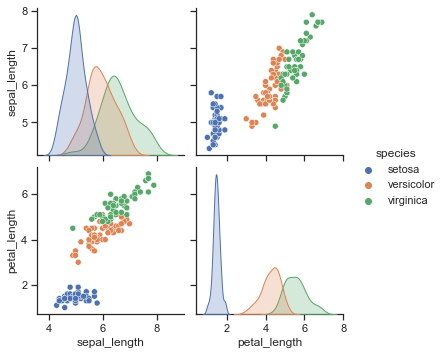

In [1]:
    from sklearn.datasets import load_iris
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set(style="ticks")

    df = sns.load_dataset("iris")
    df02 = df.iloc[:,[0,2,4]] # 选择一对特征
    print(df02)
    sns.pairplot(df02, hue="species")
    plt.show()

从上图看出，选取的一对特征，species 分布具有一定规律。target 值给定，因此是有监督分类任务。
选择一个基础的分类算法——决策树模型，学习此任务的分类模型。

In [2]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
train_index = [i for i in range(150) if i<30 or 50<=i<80 or 100<=i<130]
test_index = [i for i in range(150) if 30<=i<50 or 80<=i<100 or 130<=i<150]
train_data, train_target = df02.iloc[train_index,[0,1]],df02.iloc[train_index,2]
test_data, test_target = df02.iloc[test_index,[0,1]],df02.iloc[test_index,2]

clf = clf.fit(train_data, train_target)
print(clf)

DecisionTreeClassifier()


使用上述模型预测：

In [4]:
test_val = clf.predict(test_data)
print(test_val)

right = [i for i, j in zip(test_val,test_target) if i==j] 
percent = len(right) / len(test_target)
print(percent)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica']
0.95
